# Directing Customers to Subscription Through App Behavior Analysis

- In today's market, many companies have a mobile presence. 
- Often, these Companies provide free products/ servicesin their mobile apps in an attempts to tranition their customers to 
  paid  membership.
- some of the example are Youtube Red, Pandora Premium.
- since, marketing efforts are never free, these companes need to know exactly who to target with offfer and promotions.
- In market, target audience is customers who use company free product.
- while the enhanced version of free product is premium one.
- Our Goals to predict their chance to buy premium product.

- Dataset is about the free and premium subscription of product used by the customer.

- we APPLY three model to predict the result:-
      LOGISTIC REGRESSION
      RANDOM FOREST

### Importing the library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser

In [2]:
dataset = pd.read_csv("F:\\PROJECT\\4. Directing Customers to Subscription Through App Behavior Analysis\\appdata10.csv")

In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


#### Data Cleaning

In [4]:
dataset['hour'] = dataset.hour.str.slice(1, 3).astype(int)

In [5]:
dataset2 = dataset.copy().drop(columns = ['user','screen_list', 'enrolled_date', 'first_open', 'enrolled' ])

In [6]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


### Visualising the dataset

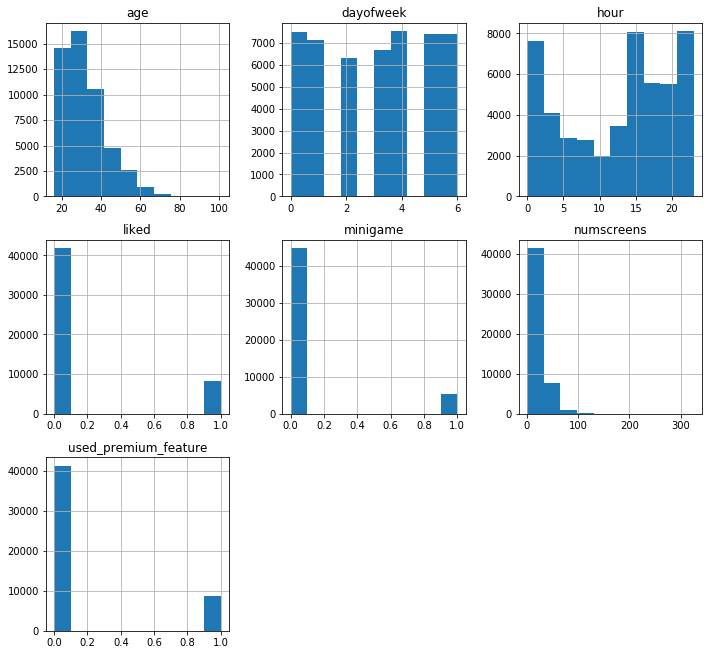

In [7]:
#plt.suptitle("histogram of Numerical Columns", fontsize = 20)
dataset2.hist(figsize = (10, 10))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

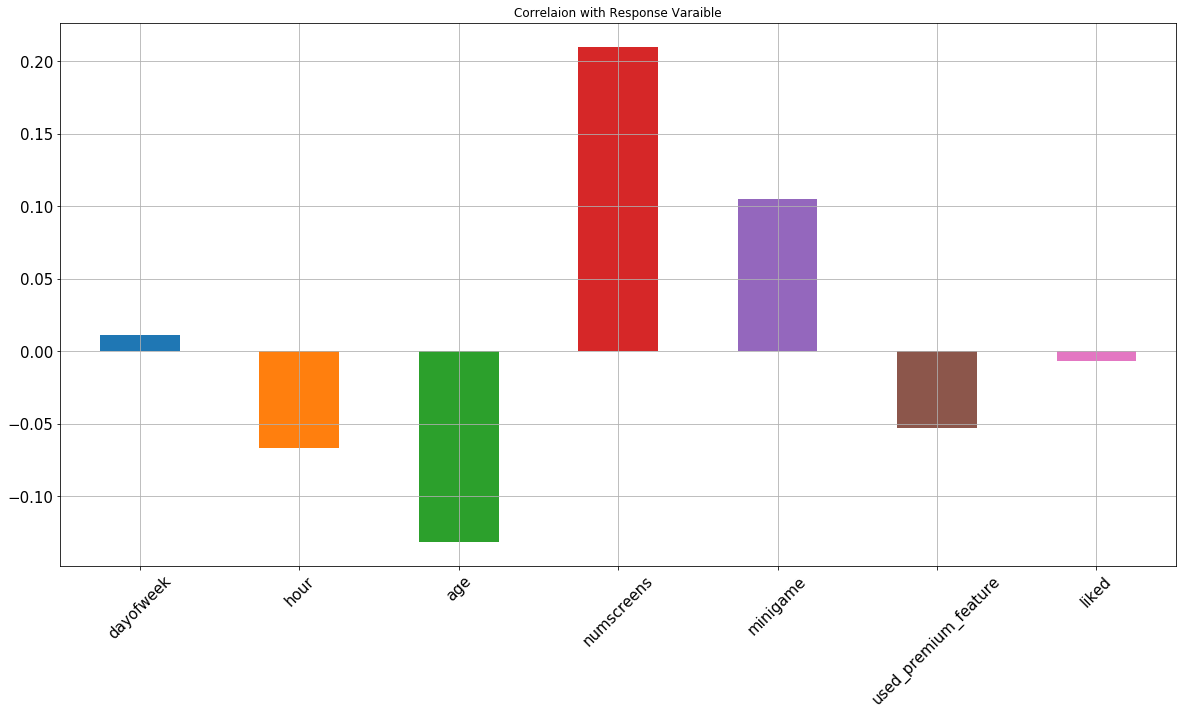

In [8]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20, 10),
                                            title = 'Correlaion with Response Varaible',
                                            fontsize = 15, rot = 45, grid = True)

### Visualise the correlation Matrix

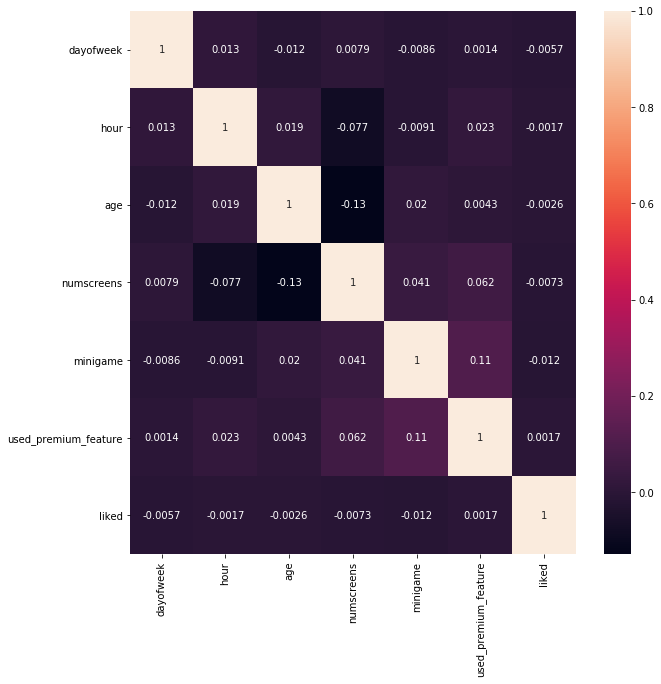

In [9]:
plt.figure(figsize=(10,10)) 
sns.heatmap(dataset2.corr(), annot=True) 

### Applying the Feature Enginerring

In [10]:
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]

In [11]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

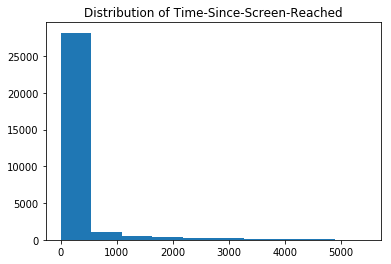

In [12]:
dataset["difference"] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')
response_hist = plt.hist(dataset["difference"].dropna())
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

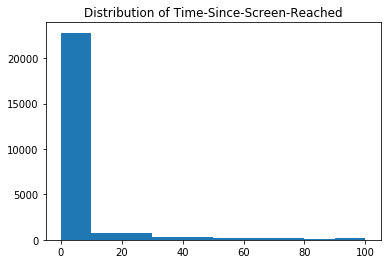

In [13]:
plt.hist(dataset["difference"].dropna(), range = [0, 100])
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

In [14]:
dataset

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0
5,56480,2013-04-03 09:58:15.752,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0,0.0
6,144649,2012-12-25 02:33:18.461,1,2,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaT,0,NaN
7,249366,2012-12-11 03:07:49.875,1,3,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaT,0,NaN
8,372004,2013-03-20 14:22:01.569,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0,920.0
9,338013,2013-04-26 18:22:16.013,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0,0.0


In [15]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])

#### Reading the Top Screen csv file

In [16]:
# Load Top Screens
top_screens = pd.read_csv('F:\\PROJECT\\4. Directing Customers to Subscription Through App Behavior Analysis\\top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [17]:
dataset['screen_list'] = dataset.screen_list.astype(str) + ','

In [18]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc + ',', '')

In [19]:
dataset['Other'] = dataset.screen_list.str.count('')
dataset = dataset.drop(columns = ['screen_list'])

### Funnels

In [20]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]

In [21]:
dataset['savingcount'] = dataset[savings_screens].sum(axis = 1)
dataset = dataset.drop(columns = savings_screens)

In [22]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

In [23]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

In [24]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [25]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,savingcount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,92,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,67,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,76,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,133,0,2,0,1


writing the process dataset to the new csv file

#### Writing the final dataset after cleaning

In [26]:
dataset.to_csv('new_appdata10.csv', index = False)

#### Loading the final dataset for model preddiction

In [27]:
dataset = pd.read_csv('new_appdata10.csv')

In [28]:
dataset.dtypes

user                       int64
dayofweek                  int64
hour                       int64
age                        int64
numscreens                 int64
minigame                   int64
used_premium_feature       int64
enrolled                   int64
liked                      int64
location                   int64
Institutions               int64
VerifyPhone                int64
BankVerification           int64
VerifyDateOfBirth          int64
ProfilePage                int64
VerifyCountry              int64
Cycle                      int64
idscreen                   int64
Splash                     int64
RewardsContainer           int64
EditProfile                int64
Finances                   int64
Alerts                     int64
Leaderboard                int64
VerifyMobile               int64
VerifyHousing              int64
RewardDetail               int64
VerifyHousingAmount        int64
ProfileMaritalStatus       int64
ProfileChildren            int64
ProfileEdu

In [29]:
response = dataset['enrolled']
dataset = dataset.drop(columns = 'enrolled')

### Spliting the dataset into train and test set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset, response, test_size = 0.3, random_state = 0)

In [31]:
X_train

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,savingcount,CMCount,CCCount,LoansCount
17967,189295,3,2,27,65,0,0,1,1,0,...,0,0,0,0,0,108,5,3,0,1
32391,52616,1,15,20,20,0,0,0,0,1,...,0,0,0,0,0,69,0,1,0,1
9341,208274,1,17,31,17,0,0,0,0,1,...,0,0,0,0,0,26,6,1,0,1
7929,65017,3,20,27,10,0,0,0,1,0,...,0,0,0,0,0,33,0,0,0,0
46544,34862,0,20,29,7,1,0,0,0,0,...,0,0,0,0,0,52,0,0,0,1
4149,218715,4,0,25,29,0,1,0,1,0,...,0,0,0,0,0,149,0,0,0,1
33426,129190,5,23,32,13,0,0,0,0,0,...,0,0,0,0,0,90,0,0,0,1
3002,231763,4,17,38,21,0,1,0,0,1,...,0,0,0,0,0,73,0,1,0,1
6974,22220,5,8,42,14,0,0,0,1,0,...,0,0,0,0,0,99,0,0,0,0
16864,89522,2,18,30,25,0,0,0,1,0,...,0,0,0,0,0,130,0,0,0,1


In [32]:
train_identifier = X_train['user']
X_train = X_train.drop(columns = 'user')

In [33]:
test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')

In [34]:
X_test

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,savingcount,CMCount,CCCount,LoansCount
11841,0,1,41,34,0,0,1,1,0,1,...,0,0,0,0,0,159,0,0,0,0
19602,5,6,26,30,0,0,0,1,0,1,...,0,0,0,0,0,116,0,0,0,1
45519,0,15,37,11,0,1,0,0,0,0,...,0,0,0,0,0,74,0,1,0,2
25747,5,19,21,13,0,0,1,0,0,1,...,0,0,0,0,0,110,0,0,0,0
42642,5,1,30,32,0,0,0,0,0,1,...,0,0,0,0,0,53,3,0,2,0
31902,4,20,34,59,0,0,0,1,1,1,...,0,0,0,0,0,90,2,0,0,1
30346,1,4,20,26,0,0,0,1,0,1,...,0,0,0,0,0,184,0,0,0,1
12363,5,18,26,18,0,0,0,0,0,0,...,0,0,0,0,0,76,0,1,0,2
32490,0,17,25,41,0,0,0,1,1,1,...,0,0,0,0,0,165,3,4,0,1
26128,3,13,47,3,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1


### Applying the feature scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [36]:
X_train2 =pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

## Applying the LOGISTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
Y_pred = classifier.predict(X_test)

In [39]:
Y_pred

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

#### Analyse the results

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [41]:
cm = confusion_matrix(Y_test, Y_pred)

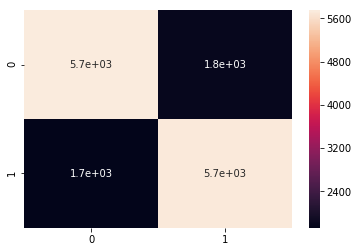

In [42]:
sns.heatmap(cm, annot = True)

In [43]:
accuracy_score(Y_test, Y_pred)

0.7653333333333333

In [44]:
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.77      0.76      0.77      7546
          1       0.76      0.77      0.77      7454

avg / total       0.77      0.77      0.77     15000



## Applying RandomForest

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10,criterion = 'entropy', random_state = 0 )

In [46]:
classifier2.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [47]:
Y_pred2 = classifier2.predict(X_test)

In [48]:
Y_pred2

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
cm = confusion_matrix(Y_test, Y_pred2)

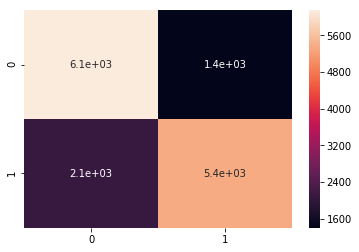

In [50]:
sns.heatmap(cm, annot = True)

In [51]:
accuracy_score(Y_test, Y_pred2)

0.7668

### Applying the GridSearch

In [52]:
## Grid Search (Round 1)
from sklearn.model_selection import GridSearchCV

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

In [53]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

In [54]:
grid_search = grid_search.fit(X_train, Y_train)

In [55]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.7605714285714286, {'C': 0.1, 'penalty': 'l1'})

In [60]:
# Formatting Final Results
final_results = pd.concat([Y_test, test_identifier], axis = 1).dropna()
final_results['predicted_reach'] = Y_pred2
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)

In [61]:
final_results

,user,enrolled,predicted_reach
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,0
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0


In [62]:
final_results.to_csv("Predicted_Result.csv",index = False)

### Here we get the Accuracy of 76.68% by Random forest

#### But we Search Best parameter by Grid Search